DEPENDENCIES

In [1]:
!pip install opencv-python-headless pillow
!pip install ultralytics

import cv2
import torch
from PIL import Image
import os
from pathlib import Path
from ultralytics import YOLO
import matplotlib.pyplot as plt
from pathlib import Path
import cv2


IMPORTING MODEL

In [2]:
model = YOLO('/kaggle/input/sh17v9/pytorch/default/1/SH17V9E.pt')  #ADD MODEL PATH HERE AS PER YOUR DIRECTORY STRUCTURE

LOADING & TESTING RANDOM SAMPLES FROM SH17 VALIDATION SET

In [3]:
val_files_path = '/kaggle/input/sh17-dataset-for-ppe-detection/val_files.txt'
with open(val_files_path, 'r') as f:
    test_images = [line.strip() for line in f.readlines()]


In [4]:
# Load the validation file paths and count the number of images
val_files_path = '/kaggle/input/sh17-dataset-for-ppe-detection/val_files.txt'
with open(val_files_path, 'r') as f:
    test_images = [line.strip() for line in f.readlines()]

# Print the number of validation images
print(f"Number of images in the validation set: {len(test_images)}")


Number of images in the validation set: 1620



image 1/1 /kaggle/input/sh17-dataset-for-ppe-detection/images/pexels-photo-3415148.jpeg: 640x480 8 persons, 5 heads, 1 shoes, 1 safety-suit, 77.9ms
Speed: 3.2ms preprocess, 77.9ms inference, 115.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 /kaggle/input/sh17-dataset-for-ppe-detection/images/pexels-photo-7430337.jpeg: 448x640 2 persons, 1 face, 3 handss, 76.1ms
Speed: 3.5ms preprocess, 76.1ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /kaggle/input/sh17-dataset-for-ppe-detection/images/pexels-photo-4560159.jpeg: 448x640 1 person, 1 ear, 1 face, 2 handss, 1 head, 37.6ms
Speed: 3.0ms preprocess, 37.6ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /kaggle/input/sh17-dataset-for-ppe-detection/images/pexels-photo-7278862.jpeg: 448x640 2 persons, 2 ears, 2 faces, 1 glasses, 4 handss, 2 heads, 37.8ms
Speed: 3.3ms preprocess, 37.8ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /kagg

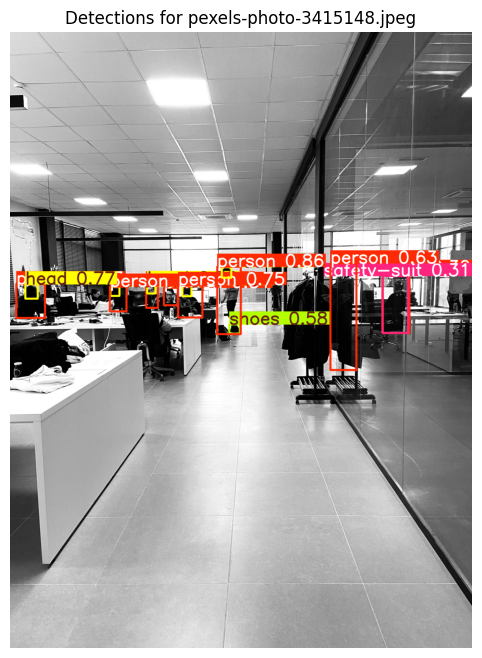

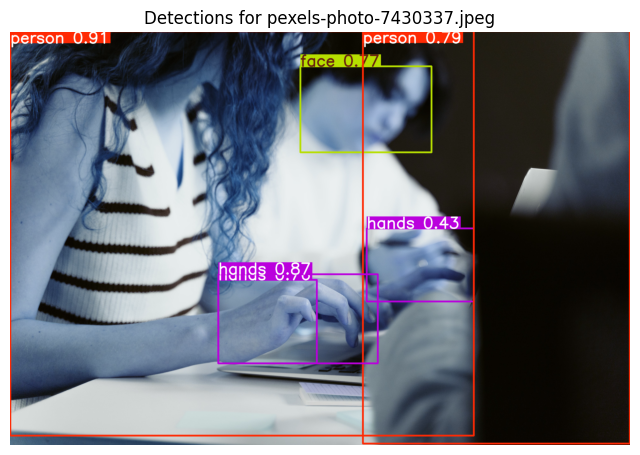

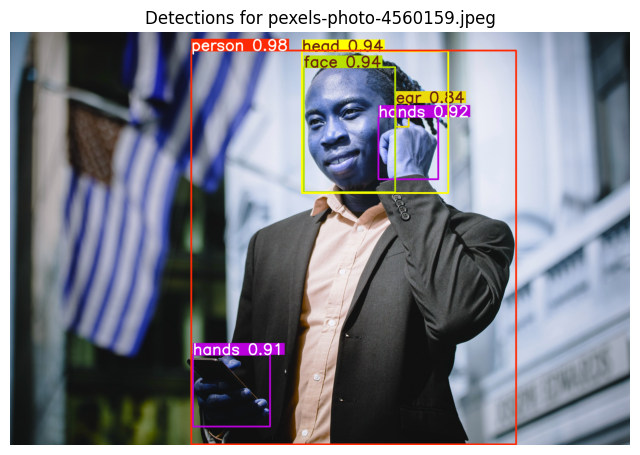

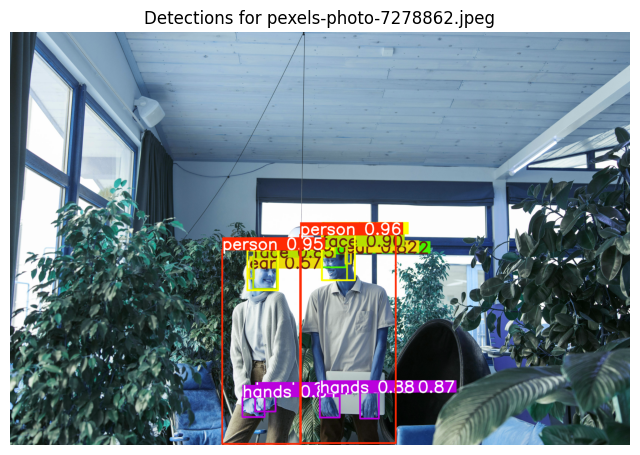

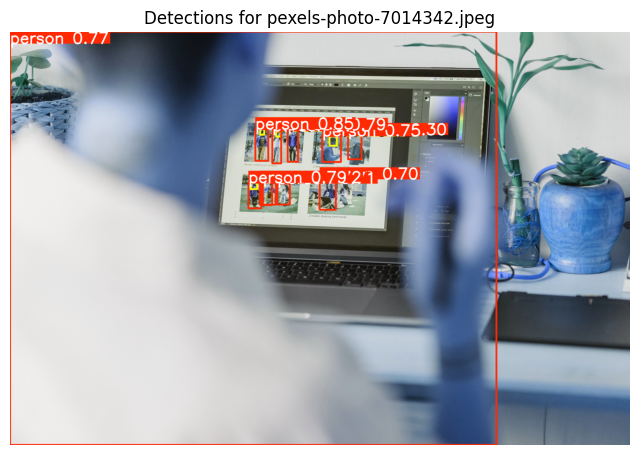

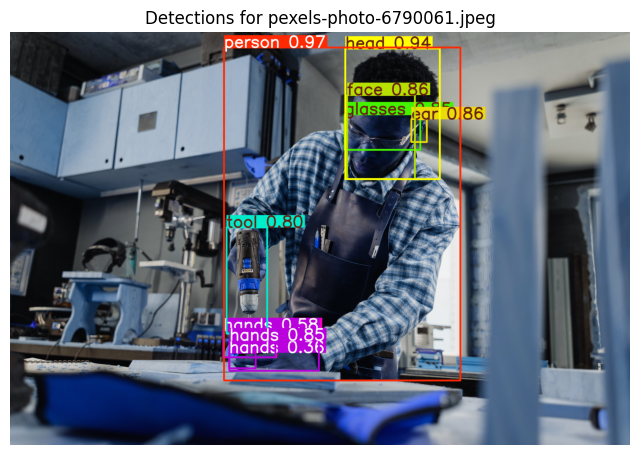

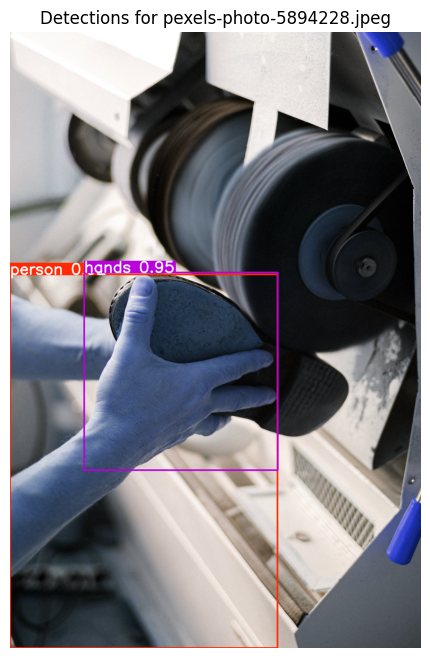

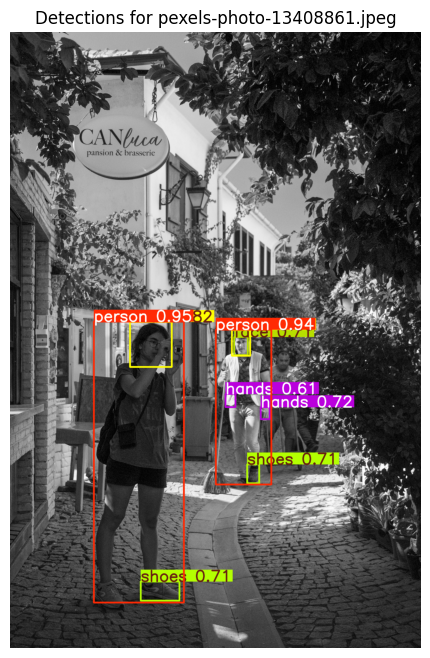

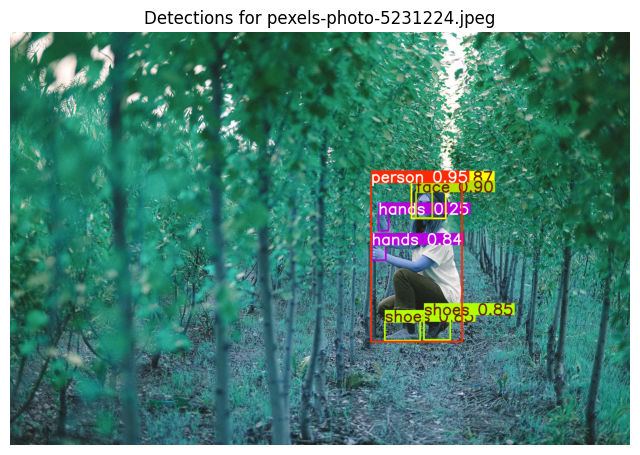

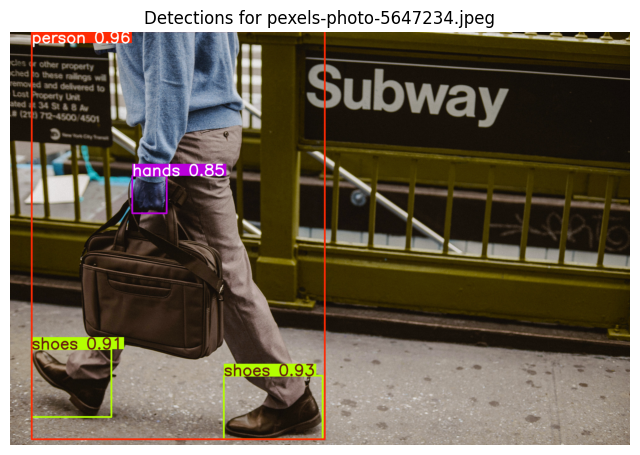

In [5]:
import random
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
from ultralytics import YOLO


val_files_path = '/kaggle/input/sh17-dataset-for-ppe-detection/val_files.txt'
with open(val_files_path, 'r') as f:
    test_images = [line.strip() for line in f.readlines()]  


random_test_images = random.sample(test_images, 10)


results = []
for img_path in random_test_images:
    full_img_path = str(Path('/kaggle/input/sh17-dataset-for-ppe-detection/images') / img_path)
    result = model(full_img_path)  
    results.append((full_img_path, result))


for img_path, result in results:  
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    annotated_img = result[0].plot()  
    
    
    plt.figure(figsize=(8, 8))
    plt.imshow(annotated_img)
    plt.axis('off')
    plt.title(f"Detections for {Path(img_path).name}")
    plt.show()



**TESTING ON PRIVATE VIDEOS DATASET(DOWNLOAD STOCK VIDEOS FROM: https://www.storyblocks.com/all-video/search/industrial%20scene?search-origin=related-search)**


In [6]:
import os
import cv2
from pathlib import Path
from ultralytics import YOLO

# Path to the directory with factory setting videos
videos_dir = '/kaggle/input/fsvideos'   #ADD THE FSVIDEOS DATASET PATH HERE

# Output directory to save processed videos
output_dir = '/kaggle/working/processed_videos_v9'
os.makedirs(output_dir, exist_ok=True)



video_files = [f for f in os.listdir(videos_dir) if f.endswith('.mp4')]

for video_file in video_files:
    video_path = os.path.join(videos_dir, video_file)
    cap = cv2.VideoCapture(video_path)
    
    
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    
    
    output_video_path = os.path.join(output_dir, f"PROCESSV9E_{video_file}")
    out = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        
        result = model(frame, verbose=False)  
        
        
        annotated_frame = result[0].plot(labels=True, conf=False)  

        
        out.write(annotated_frame)
    
    
    cap.release()
    out.release()

print("All videos processed successfully with the new model!")


All videos processed successfully with the new model!


# TESTING ON FB VIDEO (AVIOX - MANUFACTIRUNG COMAPANY)

In [9]:
import os
import cv2
from pathlib import Path
from ultralytics import YOLO

input_video_path = '/kaggle/input/aviox-video/ORIGINAL.mp4' #ADD AVOIX VIDEO PATH HERE

output_dir = '/kaggle/working/AVIOXprocessed'
os.makedirs(output_dir, exist_ok=True)


cap = cv2.VideoCapture(input_video_path)

frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

output_video_path = os.path.join(output_dir, "AVIOXPROCESSED.mp4")
out = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    
    result = model(frame, verbose=False)  
    
    
    annotated_frame = result[0].plot(labels=True, conf=False)  

    
    out.write(annotated_frame)


cap.release()
out.release()

print("AVIOX VIDEO processed successfully as AVIOXPROCESSED.mp4!")


AVIOX VIDEO processed successfully as AVIOXPROCESSED.mp4!


# TEST YOUR VIDEO

In [8]:
import os
import cv2
from pathlib import Path
from ultralytics import YOLO

input_video_path = 'ADD VIDEO INPUT PATH HERE' #ADD INPUT VIDEO PATH HERE

# Output directory to save processed video
output_dir = '/kaggle/working/YOUR_PROCESSED_VIDEOS' 
os.makedirs(output_dir, exist_ok=True)

cap = cv2.VideoCapture(input_video_path)

frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)


output_video_path = os.path.join(output_dir, "VIDPROCESSED.mp4")
out = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    
    result = model(frame, verbose=False)  
    
    
    annotated_frame = result[0].plot(labels=True, conf=False)  

    
    out.write(annotated_frame)


cap.release()
out.release()

print("YOUR INPUT VID processed successfully as VIDPROCESSED.mp4!")


YOUR INPUT VID processed successfully as VIDPROCESSED.mp4!
